In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
import os
import sys
sys.path.append(os.path.abspath(r'C:\Users\Felipe\Desktop\THE-BRIDGE\THEBRIDGE-BOOTCAMP-GITHUB\DS102024'))

In [3]:
from auto_importer import DataFrameDescriber

In [4]:
df = pd.read_csv('vgsales_limpio.csv', index_col=0)

In [5]:
df_descripcion = DataFrameDescriber(df)

In [6]:
df.head()

# JOGOS, GENEROS, PLATAFORMAS Y PUBLICANTES MAYORES DE TODOS OS TEMPOS
jogo mais vendido de todos os tempos
top10 jogos mais vendidos
genero mais vendido de todos os tempos
top10 generos mais vendidos
plataforma que mais vendeu em todos os tempos
top10 plataforma mais vendidos
publisher que mais vendeu em todos os tempos
top10 publisher mais vendidos


# TOP DE JUEGOS, GENERO Y PLATAFORMA POR DECADA
top de jogo mais vendido por decada
top de genero mais vendido por decada
top de plataforma que mais vendeu por decada

# TOP DE GENERO POR PLATAFORMA
genero mais lancado por plataforma
genero mais lancado por plataforma por decada

# TOP DE GENERO POR PUBLICANTE
genero mais lancado por publisher
genero mais lancado por publisher por decada

# TOP DE GENERO POR CONTINENTE
genero mais lancado por continente
genero mais lancado por continente por decada

# COMPARATIVO DE VENTAS PARA DESCUBRIR EL MAYOR Y MAS IMPORTANTE MERCADO
total de vendas por ano por continente para saber qual continente é mais forte como mercado



SyntaxError: invalid syntax (3863149381.py, line 4)

In [15]:
df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().sort_values(by='Year', ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
2016,22.66,26.79,13.70,7.75,70.97
2015,102.82,97.72,33.72,30.01,264.45
2014,131.97,125.65,39.46,40.02,337.05
2013,154.85,126.27,47.64,39.90,368.80
2012,155.24,118.86,51.86,37.88,364.10
2011,246.83,171.86,53.20,55.77,527.71
2010,308.38,178.68,60.65,60.62,608.43
2009,339.39,191.71,62.10,74.84,668.23
2008,357.99,187.93,61.46,83.76,691.61


# Analisis univariado

In [16]:
resumen = []

for columna in df.columns:
    data = df[columna]
    tipo_dato = df[columna].dtype

    if tipo_dato in ['float64','int64']:
        var_tipo = 'numerica'
        card_absoluta = data.nunique()
        card_relativa = (data.nunique() / len(df)) * 100
        missing_pct = round(df[columna].isnull().mean()*100,2)
        rango = (data.min(), data.max())
        moda = data.mode()[0] if not data.mode().empty else np.nan
        mean_val = data.mean()
        median_val = data.median()
        skew_val = data.skew()
        kurtosis_val = data.kurtosis()
        std_deviation_val = data.std()
        # Shapiro test
        stat_, p_ = stats.shapiro(data) if len(data) > 3 else (np.nan, np.nan) 
        normal_test = 'No normal' if p_ < 0.05 else 'Normal'
        dist = 'No Gaussiana' if p_ < 0.05 else 'Gaussiana'
        # calculo de outliers
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 -Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers = (data < limite_inferior) | (data > limite_superior)
        outliers_pct = round((outliers.sum() / len(data)) * 100,2)
        resumen.append([columna, tipo_dato, var_tipo, card_absoluta, card_relativa, dist, missing_pct, outliers_pct, rango, moda, mean_val, median_val, std_deviation_val, skew_val, kurtosis_val, normal_test])
    else:
        var_tipo = 'categorica'
        card_absoluta = data.nunique()
        card_relativa = (data.nunique() / len(df)) * 100
        # Para categoricas no se aplica normalidad
        missing_pct = round(df[columna].isnull().mean()*100,2)
        resumen.append([columna, tipo_dato, var_tipo, card_absoluta, card_relativa, None, missing_pct, None, None, None, None, None, None, None, None])

resumen_df = pd.DataFrame(resumen, columns=['variable', 'tipo de dato', 'tipo de variable', 'cardinalidad abs' ,'cardinalidad %', 'distribucion', '% missing', '% Outliers', 'rango', 'moda', 'media', 'mediana', 'desv estandar', 'asimetria', 'curtosis', 'prueba normalidad'])
resumen_df

c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16592.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16592.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16592.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.p

,variable,tipo de dato,tipo de variable,cardinalidad abs,cardinalidad %,distribucion,% missing,% Outliers,rango,moda,media,mediana,desv estandar,asimetria,curtosis,prueba normalidad
0,Name,object,categorica,11490,69.250241,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
1,Platform,object,categorica,31,0.186837,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
2,Year,int64,numerica,39,0.235053,No Gaussiana,0.0,1.94,"(1977, 2016)",2008.00,2006.384824,2007.00,5.861057,-1.060233,2.119000,No normal
3,Genre,object,categorica,12,0.072324,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
4,Publisher,object,categorica,583,3.513742,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
5,NA_Sales,float64,numerica,409,2.465043,No Gaussiana,0.0,10.13,"(0.0, 41.49)",0.00,0.264746,0.08,0.816818,18.796829,648.927996,No normal
6,EU_Sales,float64,numerica,305,1.838235,No Gaussiana,0.0,12.54,"(0.0, 29.02)",0.00,0.146705,0.02,0.505435,18.872680,755.791791,No normal
7,JP_Sales,float64,numerica,244,1.470588,No Gaussiana,0.0,14.62,"(0.0, 10.22)",0.00,0.077806,0.00,0.309344,11.204490,194.165937,No normal
8,Other_Sales,float64,numerica,157,0.946239,No Gaussiana,0.0,10.03,"(0.0, 10.57)",0.00,0.048079,0.01,0.188621,24.230051,1025.011194,No normal
9,Global_Sales,float64,numerica,623,3.754822,No Gaussiana,0.0,11.41,"(0.01, 82.74)",0.02,0.537613,0.17,1.555282,17.398104,603.748290,No normal


In [17]:
df_descripcion.describe_numerico()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16592.000000,16592.000000,16592.000000,16592.000000,16592.000000,16592.000000
mean,2006.384824,0.264746,0.146705,0.077806,0.048079,0.537613
std,5.861057,0.816818,0.505435,0.309344,0.188621,1.555282
min,1977.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [18]:
df_descripcion.describe_categorico()

,Name,Platform,Genre,Publisher
count,16592,16592,16592,16592
unique,11490,31,12,583
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2162,3315,1351


# Pareto

In [19]:
columnas_numericas = df.select_dtypes(include=['float','int']).columns

def calc_pareto(df, columnas_numericas):
    valores_ordenados = df[columnas_numericas].value_counts().sort_values(ascending=False)
    suma_acumulada = valores_ordenados.cumsum()
    porcentage_acumulada = (suma_acumulada / suma_acumulada.max()) * 100 
    
    pareto_df = pd.DataFrame({
        'value': valores_ordenados,
        'cumulative_sum': suma_acumulada,
        'cumulative_percentage': porcentage_acumulada
    })

    return pareto_df
# df_ordenado = ['suma_acumulada'] = 

In [20]:
pareto_df = calc_pareto(df, columnas_numericas)

In [21]:
filtrado_pareto_df = pareto_df[pareto_df['cumulative_percentage'] <= 80]

In [22]:
filtrado_pareto_df

value  \
Year NA_Sales EU_Sales JP_Sales Other_Sales Global_Sales          
2010 0.00     0.00     0.02     0.00        0.02             69   
2007 0.00     0.00     0.02     0.00        0.02             55   
2006 0.00     0.00     0.02     0.00        0.02             47   
2008 0.00     0.00     0.01     0.00        0.01             46   
                       0.02     0.00        0.02             46   
...                                                         ...   
2009 0.92     0.41     0.00     0.21        1.53              1   
     0.93     0.00     0.00     0.07        1.00              1   
     0.94     0.49     0.00     0.15        1.58              1   
     0.95     0.34     0.00     0.13        1.41              1   
              0.43     0.00     0.14        1.53              1   

                                                          cumulative_sum  \
Year NA_Sales EU_Sales JP_Sales Other_Sales Global_Sales                   
2010 0.00     0.00     0.02     0.00        0.02                      69   
2007 0.00     0.00     0.02     0.00        0.02                     124   
2006 0.00     0.00     0.02     0.00        0.02                     171   
2008 0.00     0.00     0.01     0.00        0.01                     217   
                       0.02     0.00        0.02                     263   
...                                                                  ...   
2009 0.92     0.41     0.00     0.21        1.53                   13269   
     0.93     0.00     0.00     0.07        1.00                   13270   
     0.94     0.49     0.00     0.15        1.58                   13271   
     0.95     0.34     0.00     0.13        1.41                   13272   
              0.43     0.00     0.14        1.53                   13273   

                                                          cumulative_percentage  
Year NA_Sales EU_Sales JP_Sales Other_Sales Global_Sales                         
2010 0.00     0.00     0.02     0.00        0.02                       0.415863  
2007 0.00     0.00     0.02     0.00        0.02                       0.747348  
2006 0.00     0.00     0.02     0.00        0.02                       1.030617  
2008 0.00     0.00     0.01     0.00        0.01                       1.307859  
                       0.02     0.00        0.02                       1.585101  
...                                                                         ...  
2009 0.92     0.41     0.00     0.21        1.53                      79.972276  
     0.93     0.00     0.00     0.07        1.00                      79.978303  
     0.94     0.49     0.00     0.15        1.58                      79.984330  
     0.95     0.34     0.00     0.13        1.41                      79.990357  
              0.43     0.00     0.14        1.53                      79.996384  

[6786 rows x 3 columns]

In [23]:
sample_df = df.sample(n=1000, random_state=42) 

# Histogramas y boxplots

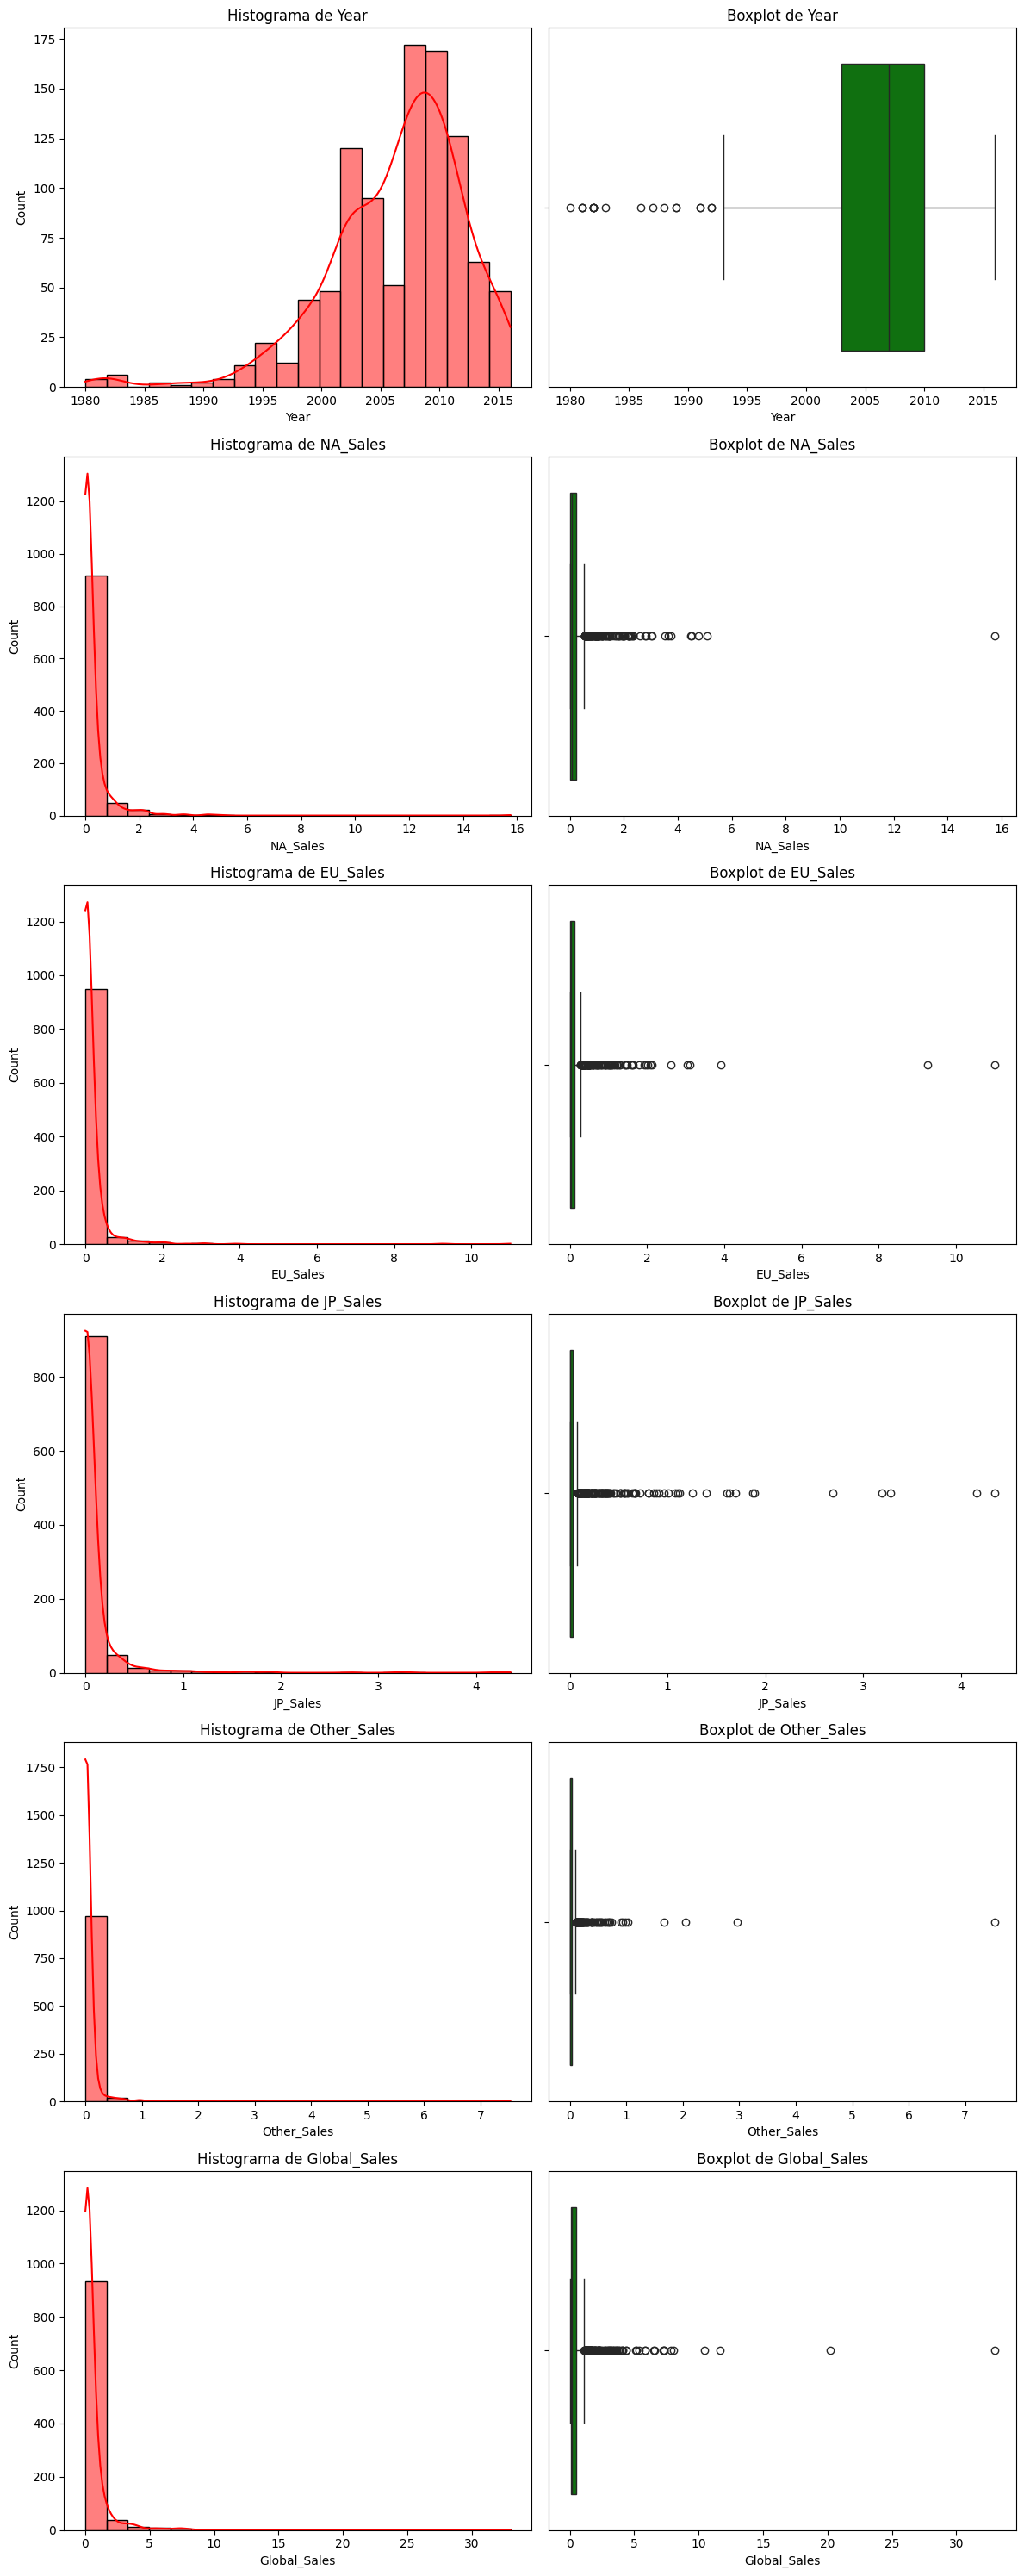

In [24]:
# Selecionar columnas numéricas
columnas_numericas = sample_df.select_dtypes(include=['float', 'int']).columns

fig, axes = plt.subplots(len(columnas_numericas), 2, figsize=(12,5 * (len(columnas_numericas))))

for idx, column in enumerate(columnas_numericas):
    sns.histplot(sample_df[column], kde=True, ax=axes[idx, 0], color='red', bins=20)
    axes[idx, 0].set_title(f'Histograma de {column}')

    sns.boxplot(x=sample_df[column], ax=axes[idx, 1], color='green')
    axes[idx, 1].set_title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()


# Juegos mas vendidos por continente

In [25]:
juego_mas_vendido_por_continente = df.iloc[:,5:8].max()

In [26]:
juego_mas_vendido_por_continente

NA_Sales    41.49
EU_Sales    29.02
JP_Sales    10.22
dtype: float64

In [27]:
df[df['NA_Sales'] == juego_mas_vendido_por_continente[0]]

C:\Users\Felipe\AppData\Local\Temp\ipykernel_20664\1966524892.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[df['NA_Sales'] == juego_mas_vendido_por_continente[0]]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [28]:
df[df['EU_Sales'] == juego_mas_vendido_por_continente[1]]

C:\Users\Felipe\AppData\Local\Temp\ipykernel_20664\1177214128.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[df['EU_Sales'] == juego_mas_vendido_por_continente[1]]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [29]:
df[df['JP_Sales'] == juego_mas_vendido_por_continente[2]]

C:\Users\Felipe\AppData\Local\Temp\ipykernel_20664\1285263190.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[df['JP_Sales'] == juego_mas_vendido_por_continente[2]]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


# Listado de Géneros de juegos mas fabricados

In [30]:
df['Genre'].value_counts()

Genre
Action          3315
Sports          2346
Misc            1739
Role-Playing    1486
Shooter         1308
Adventure       1286
Racing          1249
Platform         886
Simulation       866
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

# Empresas que más publicaron juegos

In [31]:
df['Publisher'].value_counts()

Publisher
Electronic Arts                 1351
Activision                       976
Namco Bandai Games               932
Ubisoft                          920
Konami Digital Entertainment     832
                                ... 
UIG Entertainment                  1
Piacci                             1
Ascaron Entertainment              1
Naxat Soft                         1
Epic Games                         1
Name: count, Length: 583, dtype: int64

# Géneros de juegos mas vendidos por continente

In [32]:
df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)

Genre
Role-Playing    352.27
Action          159.94
Sports          135.37
Platform        130.77
Misc            107.76
Fighting         87.35
Simulation       63.70
Puzzle           57.31
Racing           56.69
Adventure        52.07
Strategy         49.46
Shooter          38.26
Name: JP_Sales, dtype: float64

In [33]:
df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)

Genre
Action          525.00
Sports          376.85
Shooter         313.27
Racing          238.39
Misc            215.98
Platform        201.63
Role-Playing    188.06
Simulation      113.38
Fighting        101.32
Adventure        64.13
Puzzle           50.78
Strategy         45.34
Name: EU_Sales, dtype: float64

In [34]:
df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)

Genre
Action          877.83
Sports          683.35
Shooter         582.59
Platform        447.05
Misc            410.24
Racing          359.42
Role-Playing    327.28
Fighting        223.59
Simulation      183.04
Puzzle          123.78
Adventure       105.80
Strategy         68.70
Name: NA_Sales, dtype: float64

In [35]:
df.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False)

Genre
Action          187.38
Sports          134.97
Shooter         102.69
Racing           77.27
Misc             75.32
Role-Playing     59.61
Platform         51.59
Fighting         36.68
Simulation       31.50
Adventure        16.81
Puzzle           12.55
Strategy         11.36
Name: Other_Sales, dtype: float64

# Los 15 juegos mas vendidos por continente

In [36]:
df.groupby('Name')['JP_Sales'].sum().sort_values(ascending=False).head(15)

Name
Pokemon Red/Pokemon Blue                       10.22
Pokemon Gold/Pokemon Silver                     7.20
Super Mario Bros.                               6.96
New Super Mario Bros.                           6.50
Pokemon Diamond/Pokemon Pearl                   6.04
Tetris                                          6.03
Pokemon Black/Pokemon White                     5.65
Dragon Quest VII: Warriors of Eden              5.40
Pokemon Ruby/Pokemon Sapphire                   5.38
Animal Crossing: Wild World                     5.33
Brain Age 2: More Training in Minutes a Day     5.32
Final Fantasy III                               5.12
Monster Hunter Freedom 3                        4.87
New Super Mario Bros. Wii                       4.70
Super Mario Bros. 3                             4.67
Name: JP_Sales, dtype: float64

In [37]:
df.groupby('Name')['EU_Sales'].sum().sort_values(ascending=False).head(15)

Name
Wii Sports                                      29.02
Grand Theft Auto V                              23.04
Mario Kart Wii                                  12.88
FIFA 15                                         12.40
Call of Duty: Modern Warfare 3                  11.29
FIFA 16                                         11.29
FIFA 14                                         11.14
Call of Duty: Black Ops II                      11.05
Wii Sports Resort                               11.01
Nintendogs                                      11.00
FIFA Soccer 13                                  10.25
The Sims 3                                       9.60
Call of Duty: Black Ops 3                        9.56
Call of Duty: Black Ops                          9.50
Brain Age: Train Your Brain in Minutes a Day     9.26
Name: EU_Sales, dtype: float64

In [38]:
df.groupby('Name')['NA_Sales'].sum().sort_values(ascending=False).head(15)

Name
Wii Sports                        41.49
Super Mario Bros.                 32.48
Duck Hunt                         26.93
Tetris                            26.17
Grand Theft Auto V                23.46
Call of Duty: Black Ops           17.59
Super Mario World                 15.99
Mario Kart Wii                    15.85
Wii Sports Resort                 15.75
Call of Duty: Modern Warfare 3    15.58
Kinect Adventures!                14.97
Call of Duty: Ghosts              14.92
New Super Mario Bros. Wii         14.59
Call of Duty: Black Ops II        14.08
Wii Play                          14.03
Name: NA_Sales, dtype: float64

In [39]:
df.groupby('Name')['Other_Sales'].sum().sort_values(ascending=False).head(15)

Name
Grand Theft Auto: San Andreas     10.72
Wii Sports                         8.46
Grand Theft Auto V                 8.03
Gran Turismo 4                     7.53
Call of Duty: Black Ops II         3.88
FIFA Soccer 08                     3.53
Pro Evolution Soccer 2008          3.51
Call of Duty: Black Ops 3          3.42
Call of Duty: Black Ops            3.36
Call of Duty: Modern Warfare 3     3.35
Mario Kart Wii                     3.31
FIFA 15                            3.29
FIFA Soccer 13                     3.03
Call of Duty: Modern Warfare 2     3.01
FIFA 14                            2.98
Name: Other_Sales, dtype: float64

# Géneros más fabricados por plataforma

In [40]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [41]:
# pd.set_option('display.max_rows', None)
df.groupby(['Genre','Publisher']).size()

Genre     Publisher                             
Action    20th Century Fox Video Games               4
          3DO                                       17
          505 Games                                 21
          5pb                                        5
          989 Studios                                2
                                                    ..
Strategy  Vivendi Games                             12
          Warner Bros. Interactive Entertainment     2
          Westwood Studios                           1
          Zoo Digital Publishing                     1
          Zushi Games                                2
Length: 1833, dtype: int64

# Analisis de Pareto 

In [42]:
def calc_pareto(df, column):
    valores_ordenados = df[column].value_counts().sort_values(ascending=False)
    suma_acumulada = valores_ordenados.cumsum()
    porcentage_acumulada = (suma_acumulada / suma_acumulada.max()) * 100 
    return porcentage_acumulada

In [43]:
pareto_values_as_df = pd.DataFrame(calc_pareto(df,"Platform"))

In [44]:
pareto_values_as_df = pareto_values_as_df.reset_index(drop=False)

In [45]:
n_ocurrencias = pd.DataFrame(df['Platform'].value_counts())

In [46]:
n_ocurrencias

,count
Platform,
DS,2162
PS2,2161
PS3,1329
Wii,1324
X360,1264
PSP,1213
PS,1196
PC,960
XB,824


In [47]:
pareto_values_as_df.sort_values(by='count', ascending=False)

,Platform,count
30,PCFX,100.000000
29,GG,99.993973
28,TG16,99.987946
27,3DO,99.975892
26,WS,99.957811
25,SCD,99.921649
24,NG,99.885487
23,GEN,99.813163
22,DC,99.650434
21,GB,99.337030


In [48]:
tablas_frecuencia_valores = pd.merge(pareto_values_as_df, n_ocurrencias, on='Platform').sort_values(by='count_x', ascending=True)

In [49]:
tablas_frecuencia_valores.rename(columns={"count_x": "frecuencia relativa", "count_y": "ocurrencias"})

,Platform,frecuencia relativa,ocurrencias
0,DS,13.030376,2162
1,PS2,26.054725,2161
2,PS3,34.064609,1329
3,Wii,42.044359,1324
4,X360,49.662488,1264
5,PSP,56.973240,1213
6,PS,64.181533,1196
7,PC,69.967454,960
8,XB,74.933703,824
9,GBA,79.887898,822


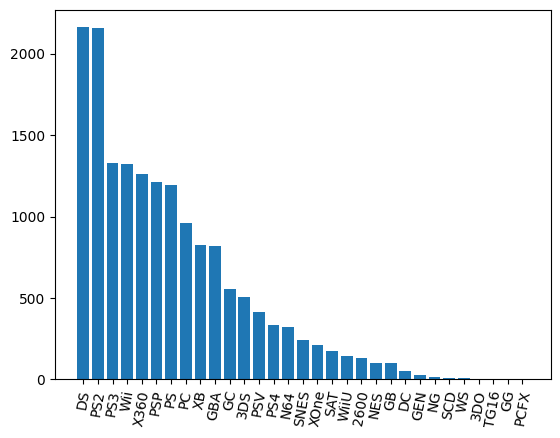

In [50]:
plt.bar('Platform', 'count_y', data=tablas_frecuencia_valores)
plt.xticks(rotation=80);

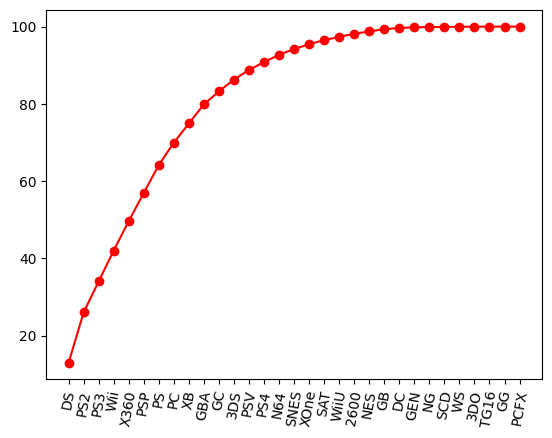

In [51]:
plt.plot('Platform', 'count_x', data=tablas_frecuencia_valores, marker='o', color='red')
plt.xticks(rotation=80);

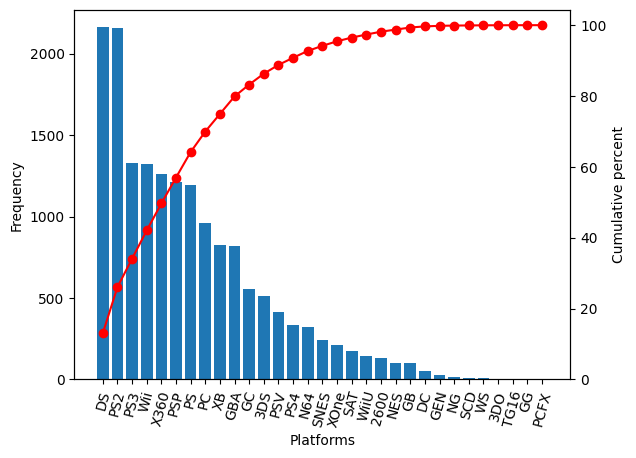

In [52]:
fig,ax = plt.subplots()
ax.set_xlabel('Platforms')
ax.bar('Platform', 'count_y', data=tablas_frecuencia_valores)
ax.set_ylabel('Frequency')
plt.xticks(rotation=75)

ax2 = ax.twinx()
ax2.plot('Platform', 'count_x', data=tablas_frecuencia_valores, marker='o', color='red')
ax2.set_ylabel('Cumulative percent')
ax2.set_ylim(ymin=0)
plt.show()

In [58]:
percentiles_pareto = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']].quantile(.8)

In [59]:
percentiles_pareto

NA_Sales        0.31
EU_Sales        0.16
JP_Sales        0.06
Other_Sales     0.05
Global_Sales    0.61
Name: 0.8, dtype: float64

In [122]:
top_20perc = df[df['Global_Sales'] > percentiles_pareto['Global_Sales']]

In [123]:
ultimos80_perc = df[df['Global_Sales'] <= percentiles_pareto['Global_Sales']]

In [124]:
ultimos80_perc

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
3284,Formula 1: Championship Edition,PS3,2006,Racing,Sony Computer Entertainment,0.00,0.57,0.04,0.00,0.61
3285,Muramasa: The Demon Blade,Wii,2009,Role-Playing,Rising Star Games,0.33,0.13,0.11,0.04,0.61
3286,NBA 2K9,PS3,2008,Sports,Take-Two Interactive,0.56,0.00,0.00,0.05,0.61
3287,SingStar Singalong With Disney,PS2,2008,Misc,Sony Computer Entertainment,0.00,0.04,0.00,0.57,0.61
3288,NHL 16,PS4,2015,Sports,Electronic Arts,0.35,0.15,0.00,0.11,0.61
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [125]:
top_20perc

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
3279,Tomb Raider III: Adventures of Lara Croft,PC,1998,Action,Eidos Interactive,0.59,0.03,0.00,0.00,0.62
3280,Toshochu: Run for Money,3DS,2012,Adventure,Namco Bandai Games,0.00,0.00,0.62,0.00,0.62
3281,Dragon Quest Monsters: Joker 2 Professional,DS,2011,Role-Playing,Square Enix,0.00,0.00,0.62,0.00,0.62


In [130]:
top_20perc['Global_Sales'].sum()

np.float64(6649.4400000000005)

In [129]:
ultimos80_perc['Global_Sales'].sum()

np.float64(2270.63)

In [131]:
outliers = top_20perc[top_20perc['Global_Sales'] > top_20perc['Global_Sales'].quantile(0.95)]
print(outliers[['Name', 'Global_Sales', 'Platform', 'Genre']])


                              Name  Global_Sales Platform         Genre
Rank                                                                   
1                       Wii Sports         82.74      Wii        Sports
2                Super Mario Bros.         40.24      NES      Platform
3                   Mario Kart Wii         35.82      Wii        Racing
4                Wii Sports Resort         33.00      Wii        Sports
5         Pokemon Red/Pokemon Blue         31.37       GB  Role-Playing
...                            ...           ...      ...           ...
161             Forza Motorsport 3          5.51     X360        Racing
162   Monster Hunter Freedom Unite          5.50      PSP  Role-Playing
163            Super Mario Advance          5.49      GBA      Platform
164      Mario Kart: Super Circuit          5.47      GBA        Racing
165              Super Mario World          5.46      GBA      Platform

[165 rows x 4 columns]


In [134]:
no_outliers = top_20perc[top_20perc['Global_Sales'] <= top_20perc['Global_Sales'].quantile(0.95)]


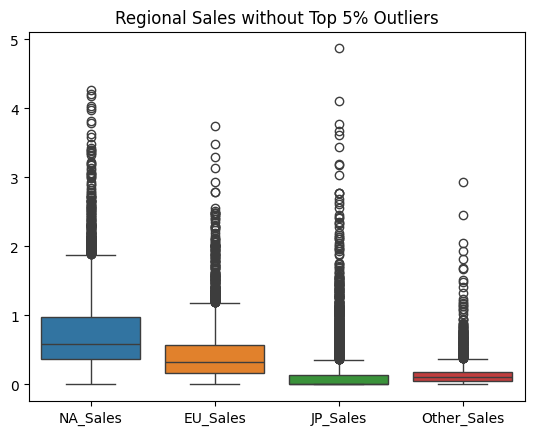

In [139]:
sns.boxplot(data=no_outliers[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])
plt.title('Regional Sales without Top 5% Outliers')
plt.show()

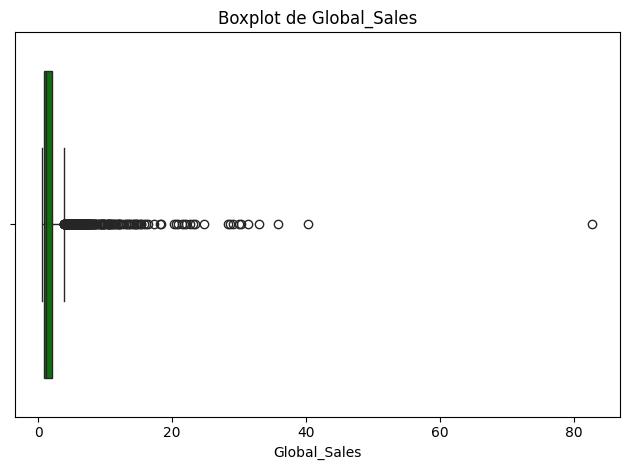

In [132]:
sns.boxplot(x=top_20perc['Global_Sales'], color='green')
plt.title(f'Boxplot de Global_Sales')

plt.tight_layout()
plt.show()

# Top ventas globales

In [53]:
df.sort_values(by='Global_Sales', ascending=False).head(30)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [54]:
cols_to_plot = resumen_df[resumen_df['cardinalidad abs'] < 42]

In [55]:
cols_to_plot['variable'].tolist()

['Platform', 'Year', 'Genre']

In [56]:
def plot_histogramas(df, columns, rows=3, cols=3, figsize=(20,20)):
    total_histogramas = len(columns)
    
    if total_histogramas > rows*cols:
        rows = int(np.ceil(total_histogramas/cols))

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if i < len(axes):
            sns.histplot(data=df, x=column, ax=axes[i])
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
        else:
            axes[i].set_visible(False)

    for j in range(len(columns), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

ValueError: Could not interpret value `variable` for `x`. An entry with this name does not appear in `data`.

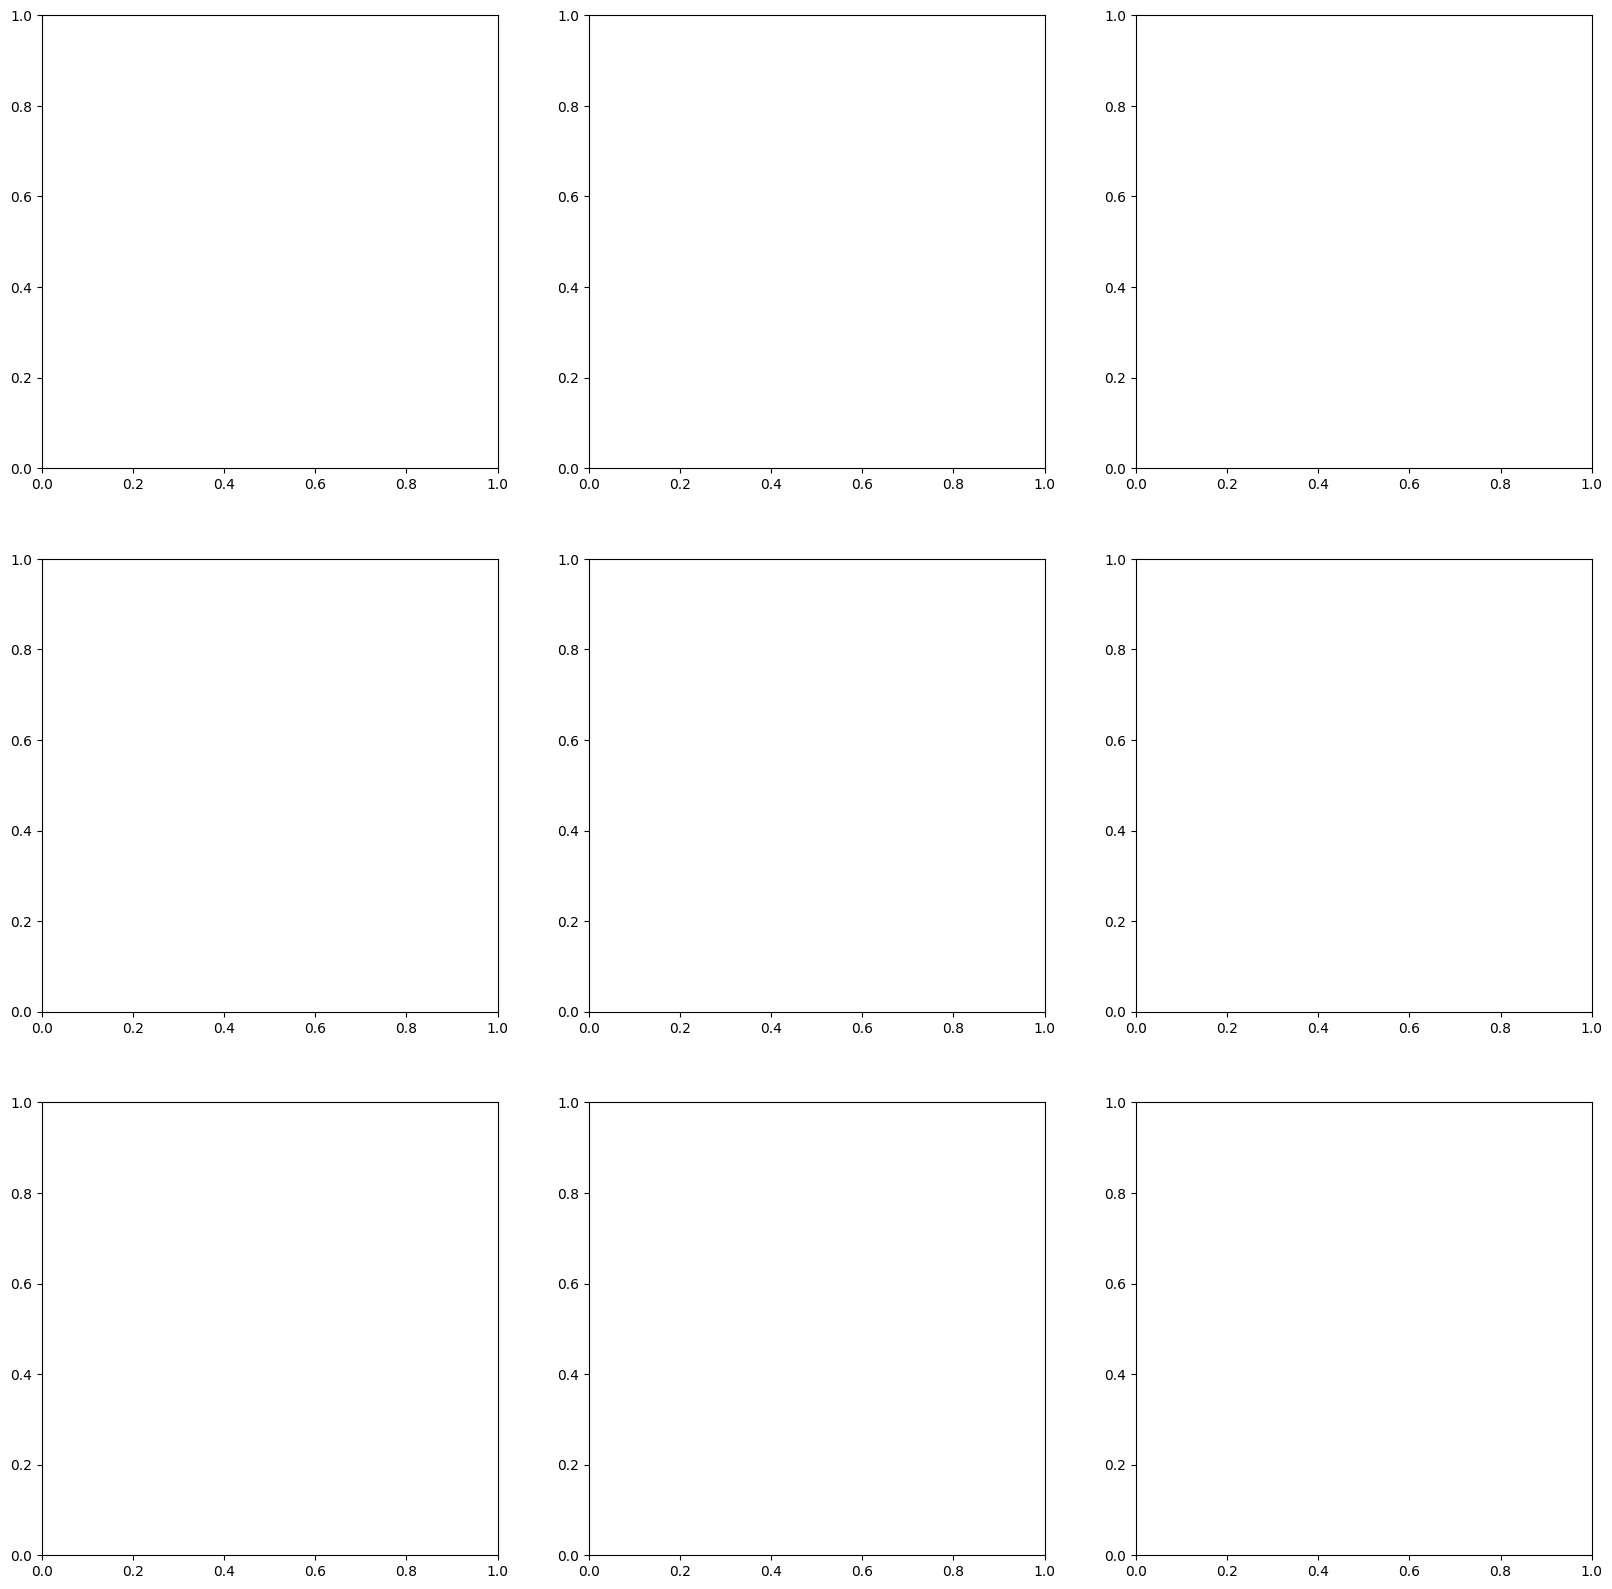

In [57]:
plot_histogramas(df,cols_to_plot)

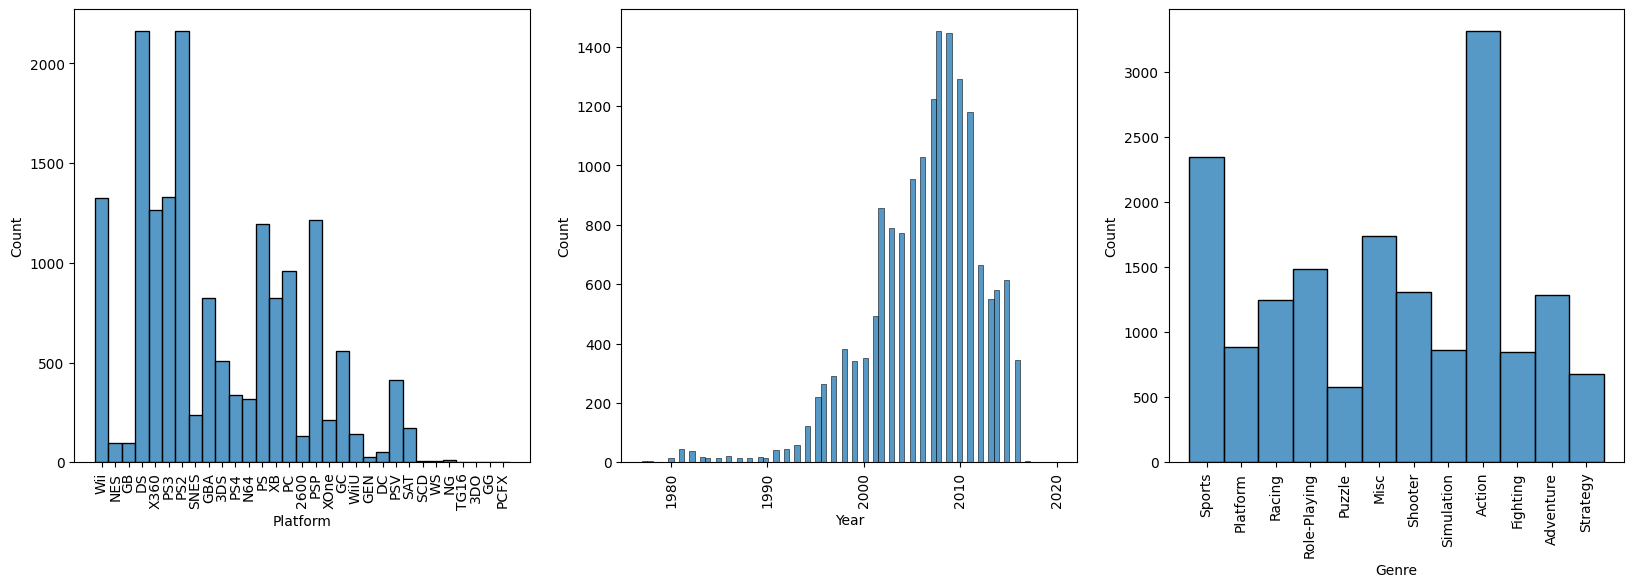

In [57]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.histplot(data=df,x='Platform')
locs,labels = plt.xticks()
plt.setp(labels, rotation= 90);

plt.subplot(3,3,2)
sns.histplot(data=df,x='Year')
locs,labels = plt.xticks()
plt.setp(labels, rotation= 90);

plt.subplot(3,3,3)
sns.histplot(data=df,x='Genre')
locs,labels = plt.xticks()
plt.setp(labels, rotation= 90);



In [1]:
# Function to calculate absolute and relative frequencies and analyze cardinality
def categorical_analysis(df, column_name):
    frequencies = df[column_name].value_counts()
    relative_frequencies = df[column_name].value_counts(normalize=True) * 100
    cardinality = df[column_name].nunique()
    return frequencies, relative_frequencies, cardinality

# Analyze categorical variables
categorical_results = {}
categorical_columns = ['Name', 'Platform', 'Genre', 'Publisher']

for col in categorical_columns:
    abs_freq, rel_freq, card = categorical_analysis(df, col)
    categorical_results[col] = {
        "absolute_frequencies": abs_freq,
        "relative_frequencies": rel_freq,
        "cardinality": card
    }

# Display cardinality for all variables
cardinalities = {col: result["cardinality"] for col, result in categorical_results.items()}
cardinalities


NameError: name 'df' is not defined

In [2]:
# Plot absolute and relative frequencies for Platform, Genre, and Publisher
def plot_categorical_distribution(df, column_name, top_n=None):
    abs_freq = df[column_name].value_counts()
    rel_freq = df[column_name].value_counts(normalize=True) * 100
    
    if top_n:
        abs_freq = abs_freq.head(top_n)
        rel_freq = rel_freq.head(top_n)
    
    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    abs_freq.plot(kind='bar', ax=axes[0], color='skyblue', title=f"{column_name} - Absolute Frequencies")
    rel_freq.plot(kind='bar', ax=axes[1], color='lightgreen', title=f"{column_name} - Relative Frequencies (%)")
    axes[0].set_ylabel("Count")
    axes[1].set_ylabel("Percentage")
    plt.tight_layout()
    plt.show()

# Focus on top 10 for Publisher due to high cardinality
plot_categorical_distribution(df, 'Platform')
plot_categorical_distribution(df, 'Genre')
plot_categorical_distribution(df, 'Publisher', top_n=10)


NameError: name 'df' is not defined

In [3]:
# Function to create Pareto diagrams
def plot_pareto(df, column_name, top_n=None):
    abs_freq = df[column_name].value_counts()
    if top_n:
        abs_freq = abs_freq.head(top_n)
    
    cum_freq = abs_freq.cumsum()
    cum_perc = cum_freq / cum_freq.max() * 100

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))
    abs_freq.plot(kind='bar', color='steelblue', ax=ax1)
    ax1.set_ylabel('Absolute Frequency')
    ax1.set_title(f'Pareto Diagram for {column_name}')
    
    ax2 = ax1.twinx()
    cum_perc.plot(color='red', ax=ax2, style='-o')
    ax2.set_ylabel('Cumulative Percentage (%)')
    
    plt.tight_layout()
    plt.show()

# Generate Pareto diagrams
plot_pareto(df, 'Platform')
plot_pareto(df, 'Genre')
plot_pareto(df, 'Publisher', top_n=10)


NameError: name 'df' is not defined

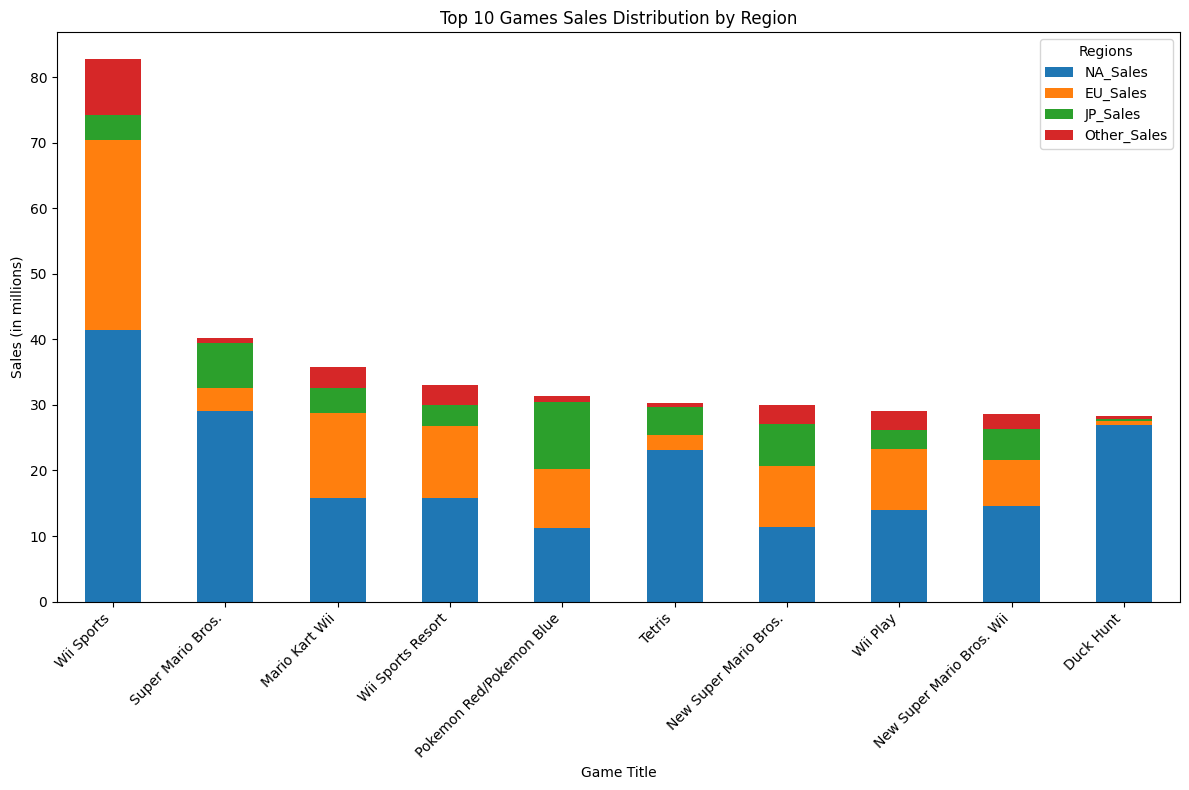

In [14]:
import matplotlib.pyplot as plt

# Filter relevant columns and sort by Global_Sales to identify the top 10 games
filtered_df = df[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
top_10_games = filtered_df.sort_values(by='Global_Sales', ascending=False).head(10)

# Plotting sales distribution for the top 10 games
top_10_games.set_index('Name')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    title="Top 10 Games Sales Distribution by Region"
)
plt.ylabel("Sales (in millions)")
plt.xlabel("Game Title")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Regions")
plt.tight_layout()
plt.show()


NameError: name 'sales_columns' is not defined

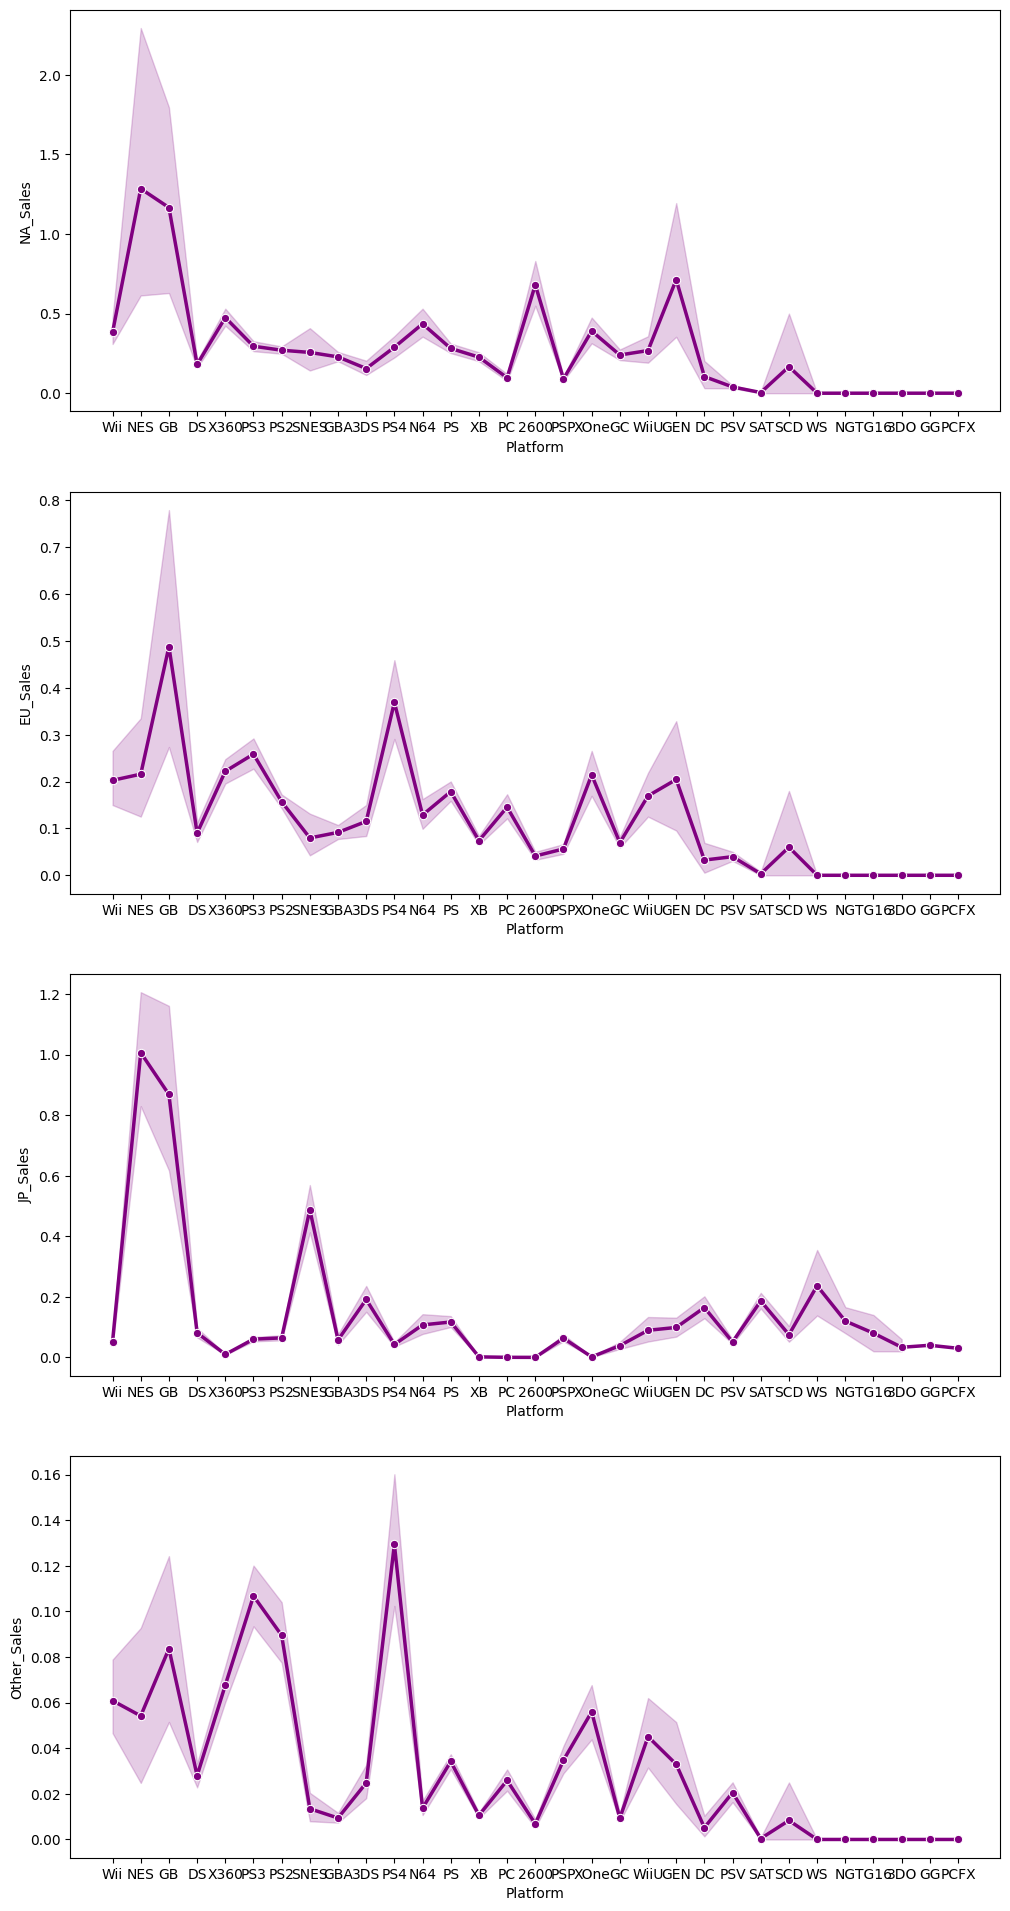

In [15]:
# Create a grid of plots (4 rows and 1 column)
fig, axes = plt.subplots(4, 1, figsize=(12, 24))

# Create separate plots for each region
sns.lineplot(ax=axes[0], data=df, x='Platform', y='NA_Sales', marker='o', color='purple', linewidth=2.5)
sns.lineplot(ax=axes[1], data=df, x='Platform', y='EU_Sales', marker='o', color='purple', linewidth=2.5)
sns.lineplot(ax=axes[2], data=df, x='Platform', y='JP_Sales', marker='o', color='purple', linewidth=2.5)
sns.lineplot(ax=axes[3], data=df, x='Platform', y='Other_Sales', marker='o', color='purple', linewidth=2.5)

# Add labels on the plot
for ax, data, sales_column, ylabel in zip(axes, sales_columns,
                                           ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                                           ['Sales in North America', 'Sales in Europe', 'Sales in Japan', 'Sales in the Rest of the World']):
    for i, row in data.iterrows():
        ax.text(row['Platform'], row[sales_column], f"{row[sales_column]:.1f}",
                color='black', ha='center', va='bottom', fontweight='bold', fontsize=12)
    ax.set_title(f"Number of Sales per Platform in {ylabel.split(' ')[-1]}", fontsize=18, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold')
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12, labelweight='bold')

# Adjust layout and remove the legend
plt.tight_layout()
plt.show()

In [51]:
print(df[df['Publisher'] == 'Sony Computer Entertainment']['Platform'].nunique())

7


In [61]:
n_pubs = df['Publisher'].drop_duplicates()

In [ ]:
for n in n_pubs:
    counter = (df[df['Publisher'] == n]['Platform'].nunique())
    print(n, counter)

Nintendo 10
Microsoft Game Studios 5
Take-Two Interactive 17
Sony Computer Entertainment 7
Activision 20
Ubisoft 19
Bethesda Softworks 8
Electronic Arts 19
Sega 21
SquareSoft 7
Atari 13
505 Games 13
Capcom 23
GT Interactive 2
Konami Digital Entertainment 23
Sony Computer Entertainment Europe 4
Square Enix 13
LucasArts 13
Virgin Interactive 10
Warner Bros. Interactive Entertainment 13
Universal Interactive 4
Eidos Interactive 13
RedOctane 1
Vivendi Games 11
Enix Corporation 7
Namco Bandai Games 23
Palcom 1
Hasbro Interactive 6
THQ 15
Fox Interactive 2
Acclaim Entertainment 11
MTV Games 6
Disney Interactive Studios 15
Majesco Entertainment 10
Codemasters 16
Red Orb 1
Level 5 6
Arena Entertainment 1
Midway Games 12
JVC 2
Deep Silver 11
989 Studios 1
NCSoft 1
UEP Systems 1
Parker Bros. 1
Maxis 2
Imagic 1
Tecmo Koei 17
Valve Software 2
ASCII Entertainment 6
Mindscape 7
Infogrames 8
Square 3
Valve 1
Activision Value 9
Banpresto 10
D3Publisher 13
Oxygen Interactive 5
Red Storm Entertainment 2

In [87]:
df.groupby('Publisher')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().sort_values(by='Global_Sales', ascending=False).head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,817.41,418.92,457.57,95.39,1789.48
Electronic Arts,595.38,371.30,14.04,129.79,1110.66
Activision,430.21,215.67,6.55,75.39,728.18
Sony Computer Entertainment,266.10,189.23,74.64,80.84,610.80
Ubisoft,253.84,163.50,7.50,50.30,475.38
Take-Two Interactive,220.49,118.14,5.83,55.24,399.54
THQ,210.72,95.95,5.01,32.57,344.37
Konami Digital Entertainment,92.16,69.69,91.30,30.31,283.64
Sega,109.51,82.56,57.07,24.54,273.72
